<a href="https://colab.research.google.com/github/KillShotAK/UoS-Forex-Trading-Robot/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas tensorflow scikit-learn matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the pre-scaled data
X_train = pd.read_pickle('/content/x_train_EURUSD_price.pkl')  # Note: changed from x_test to x_train
y_train = pd.read_pickle('/content/y_train_EURUSD_price.pkl')
X_test = pd.read_pickle('/content/x_test_EURUSD_price.pkl')
y_test = pd.read_pickle('/content/y_test_EURUSD_price.pkl')

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11352, 17)
y_train shape: (11352,)
X_test shape: (4866, 17)
y_test shape: (4866,)


Epoch 1/500
142/142 [==============================] - 4s 9ms/step - loss: 1.6695 - accuracy: 0.3224 - val_loss: 1.2809 - val_accuracy: 0.2734 - lr: 1.0000e-05
Epoch 2/500
142/142 [==============================] - 1s 10ms/step - loss: 1.6077 - accuracy: 0.3417 - val_loss: 1.3073 - val_accuracy: 0.3170 - lr: 1.0000e-05
Epoch 3/500
142/142 [==============================] - 1s 10ms/step - loss: 1.5787 - accuracy: 0.3522 - val_loss: 1.3041 - val_accuracy: 0.3280 - lr: 1.0000e-05
Epoch 4/500
142/142 [==============================] - 1s 10ms/step - loss: 1.5454 - accuracy: 0.3566 - val_loss: 1.3245 - val_accuracy: 0.3307 - lr: 1.0000e-05
Epoch 5/500
142/142 [==============================] - 1s 9ms/step - loss: 1.5171 - accuracy: 0.3655 - val_loss: 1.3305 - val_accuracy: 0.3342 - lr: 1.0000e-05
Epoch 6/500
142/142 [==============================] - 1s 6ms/step - loss: 1.5267 - accuracy: 0.3647 - val_loss: 1.3058 - val_accuracy: 0.3452 - lr: 1.0000e-05
Epoch 7/500
142/142 [================

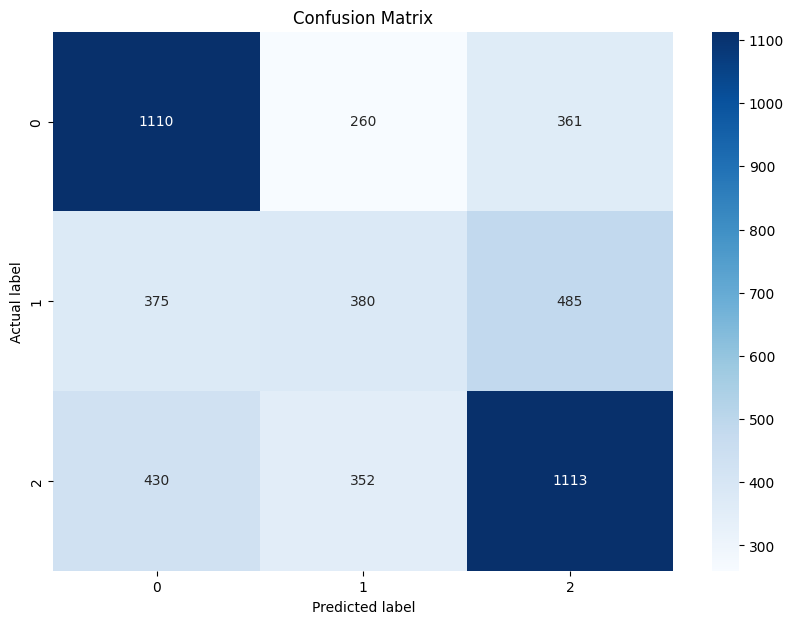

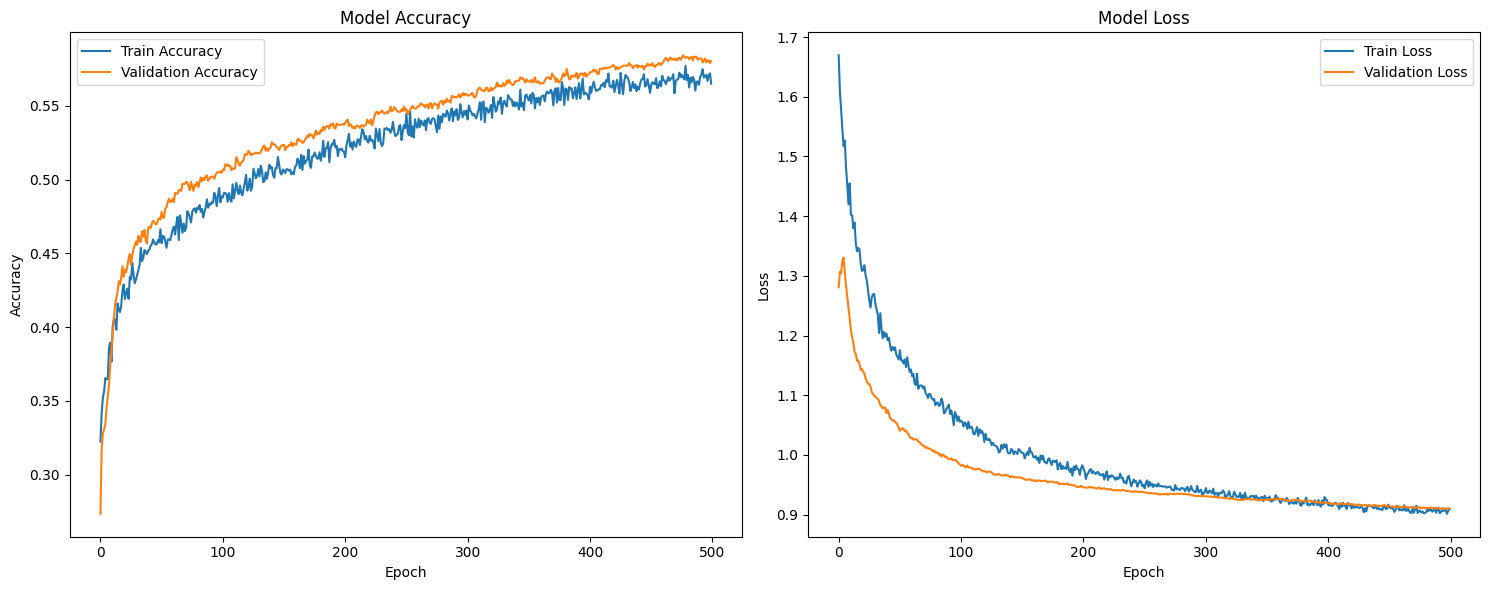

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare your data (X_train, y_train, X_valid, y_valid, X_test, y_test) here

# Define the model with increased capacity
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Assuming 3 classes for prediction
])

# Compile the model with a lower initial learning rate
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001)

history = model.fit(X_train, y_train,
                    validation_split=0.2,  # Use 20% of training data for validation
                    epochs=500,
                    batch_size=64,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_classes)
print(f"Matthews Correlation Coefficient: {mcc}")

# Function for calculating directional accuracy
def directional_accuracy(actuals, forecasts):
    return np.mean((np.sign(actuals[1:] - actuals[:-1]) == np.sign(forecasts[1:] - forecasts[:-1])).astype(int))

# Calculate Directional Accuracy
dir_acc = directional_accuracy(y_test.to_numpy(), y_pred_classes)
print(f"Directional Accuracy: {dir_acc}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plot training history
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()